<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-JCLC9027/blob/main/Actividad_Semanal_5_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

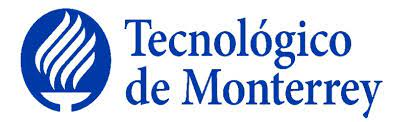

# Maestria: Inteligencia artificial aplicada (MNA)
# Materia:Ciencia Y Analítica de Datos 
# A01793052 - Juan Carlos Lopez Cruz
# Profesor Titular: PhD. María de la Paz Rico Fdz.
# Profesor Tutor: Victoria Guerrero Orozco
# Actividad Semanal -- 5 Repaso Transformación y reducción de dimensiones


# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




In [ ]:
#INCLUIR CODIGO EJERJCICIO 1
import numpy as np
from numpy import array
from numpy.linalg import eig

In [5]:
# Se crea una funcion que calcule los eigen valores y la reconsutruccion de las matrices.
def pca (A):
  print("-------Matriz original-------")
  print(A)
  print("-----------------------------")
  # calcula la eigendescomposición
  values, vectors = eig(A)
  #print(values) #D
  #print(vectors) #W

  #Ejemplo de reconstrucción


  values, vectors = np.linalg.eig(A)

  W = vectors
  Winv = np.linalg.inv(W)
  D = np.diag(values)

  #la matriz B tiene que dar igual a A
  #reconstruye la matriz 
  print("-------Matriz reconstruida-------")
  # Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
  #ojo, estas multiplicando matrices, no escalares ;)
  #TU CODIGO AQUI-------------------------------------

  B=np.real(np.round(np.matrix(W)*D* np.matrix(Winv))) # se agrega un round para redondear los valores y un real para mostrar solo la parte real de estos.
  
  
  print("-----------------------------")
  print(B)
  return 

In [9]:
#Matriz 1
A=np.array([[3,0,2],[3,0,-2],[0,1,1]])
pca(A)

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
-------Matriz reconstruida-------
-----------------------------
[[ 3.  0.  2.]
 [ 3.  0. -2.]
 [ 0.  1.  1.]]


In [7]:
#Matriz 2
A2=np.array([[1,3,8],[2,0,0],[0,0,1]])
pca(A2)

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
-------Matriz reconstruida-------
-----------------------------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]


In [8]:
#Matriz 3
A3=np.array([[5,4,0],[1,0,1],[10,7,1]])
pca(A3)

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
-------Matriz reconstruida-------
-----------------------------
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]


Comentarios:
> *Los valores 0 negativos es por que el valor de la matriz reconstruida es un valor negativo muy pequeño cercano a cero y al redondear.*

#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

In [10]:
# Carga de librerias a usar.
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [11]:
#Funcion para cargar imagen
def imagenload(img):
  plt.style.use('classic')
  
  imggray = img.convert('LA')
  imgmat = np.array(list(imggray.getdata(band=0)),float)

  print(imgmat)

  imgmat.shape = (imggray.size[1],imggray.size[0])

  plt.figure(figsize=(9,6))
  plt.imshow(imgmat,cmap='gray')
  plt.show()
  print(img)
  U,D,V = np.linalg.svd(imgmat)
  plt.clf()
  return  U,D,V

In [12]:
# funcion para reconstruir la imagen.
def imagen_recons(n,U,D,V):
  nvalue =n
  #N seleccionado para conservar la calidad de la imagen es 140.

  reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
  plt.figure(figsize=(9,6))
  plt.imshow(reconstimg,cmap='gray')
  plt.show()
  print("La imagen está comprimida")
  plt.clf()
  return reconstimg.shape

[157. 157. 157. ... 148. 142. 139.]


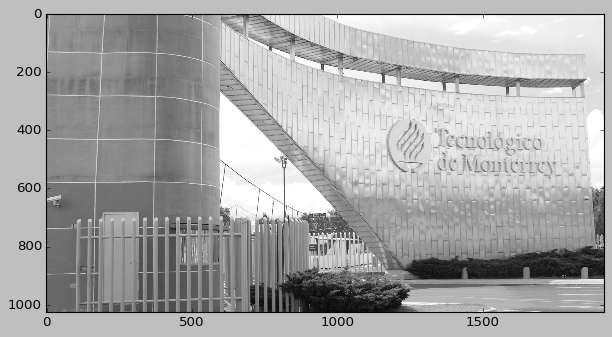

<PIL.Image.Image image mode=LA size=1920x1024 at 0x7FE69039FE50>


<Figure size 640x480 with 0 Axes>

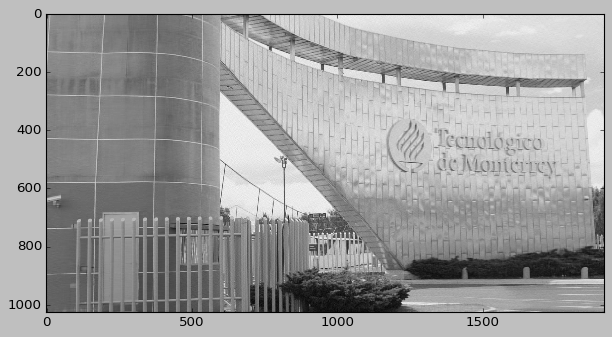

La imagen está comprimida


(1024, 1920)

<Figure size 640x480 with 0 Axes>

In [16]:
#imagen 1
img = Image.open(urllib.request.urlopen('https://conecta.tec.mx/sites/default/files/styles/header_full/public/2021-06/campus-tec-de-monterrey-conecta.jpg?itok=DSbn7gIJ')).convert('LA')
U,D,V=imagenload(img)
imagen_recons(200,U,D,V) #N es el numero de componentes que usaremos.

Comentarios:
> *Al usar valores n= 200 se ve una recontruccion con mejor calidad.*

[140. 137. 138. ...  29.  25.  42.]


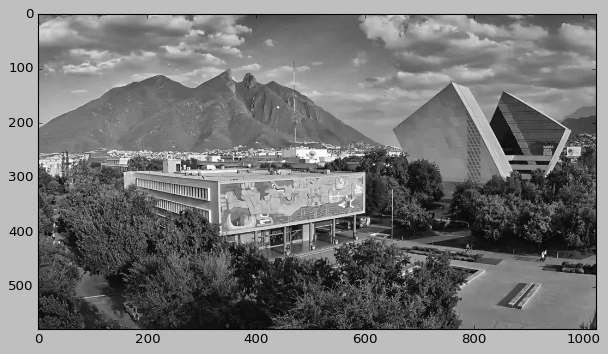

<PIL.Image.Image image mode=LA size=1024x577 at 0x7FE69027BC50>


<Figure size 640x480 with 0 Axes>

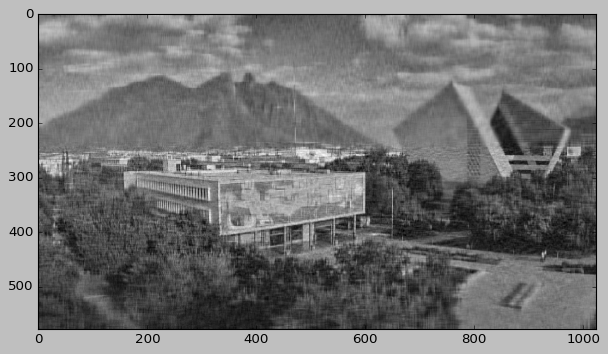

La imagen está comprimida


(577, 1024)

<Figure size 640x480 with 0 Axes>

In [18]:
#Imagen 2
img2 = Image.open(urllib.request.urlopen('https://tec.mx/sites/default/files/styles/16_9_campus/public/repositorio/universidad-en-monterrey.jpg?itok=onwlzsla')).convert('LA')
U,D,V=imagenload(img2)
imagen_recons(50,U,D,V)


[169. 169. 169. ... 235. 236. 236.]


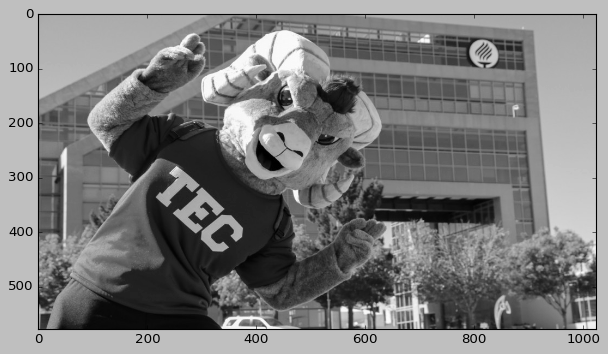

<PIL.Image.Image image mode=LA size=1024x577 at 0x7FE67C539D90>


<Figure size 640x480 with 0 Axes>

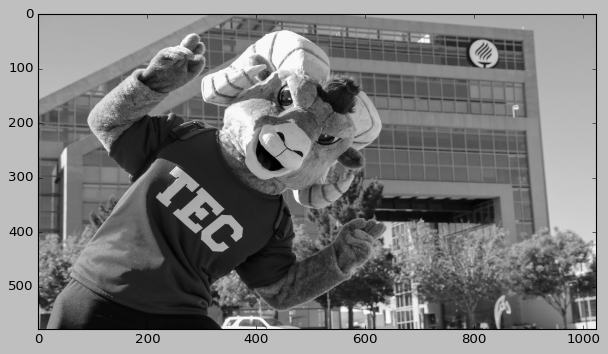

La imagen está comprimida


(577, 1024)

<Figure size 640x480 with 0 Axes>

In [33]:
#Imagen 3
img3 = Image.open(urllib.request.urlopen('https://tec.mx/sites/default/files/styles/16_9_campus/public/repositorio/Campus/teus-frente-slp.jpg?itok=XMT6chhC')).convert('LA')
U,D,V=imagenload(img3)
imagen_recons(500,U,D,V)

Comentarios:
> *Usando un N=200 la resolucion es mejor y no se pierde tanta calidad en la imagen.*

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [26]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')
# Load the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score the features
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# The PCA model
pca = PCA(n_components=2) # estimate only 2 PCs
X_new = pca.fit_transform(X) # project the original data into the PCA space

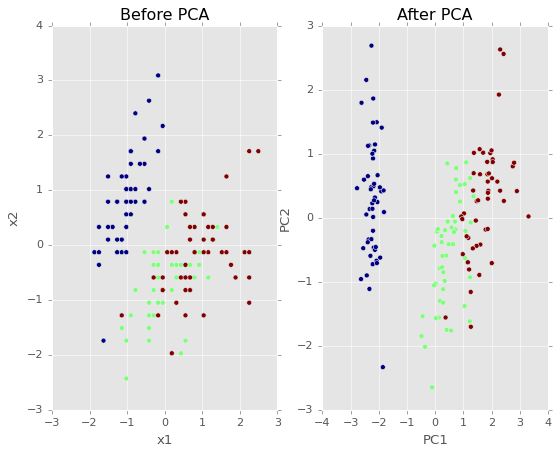

In [27]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

Comentarios:

> *Podemos ver que en el espacio PCA, la varianza se maximiza a lo largo de PC1 (explica el 73 % de la varianza) y PC2 (explica el 22 % de la varianza). Juntos, explican el 95%.*

In [ ]:
print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


Comentarios:

> *La prueba de máxima varianza también se puede ver estimando la matriz de covarianza del espacio reducido*

In [ ]:
np.cov(X_new.T)

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

Comentarios:

> *Observamos que estos valores (en la diagonal tenemos las varianzas) son iguales a los valores propios reales de la covarianza almacenada en*

In [ ]:
pca.explained_variance_


array([2.93808505, 0.9201649 ])

Comentarios:

>*La importancia de cada característica se refleja en la magnitud de los valores correspondientes en los vectores propios (mayor magnitud, mayor importancia).*

In [28]:
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


Comentarios:

> *Podemos concluir que las características 1, 3 y 4 son las más importantes para PC1. De manera similar, podemos afirmar que la función 2 y luego la 1 son las más importantes para PC2.*

##Biplot
El biplot es la mejor manera de visualizar todo en uno después de un análisis PCA.

In [29]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

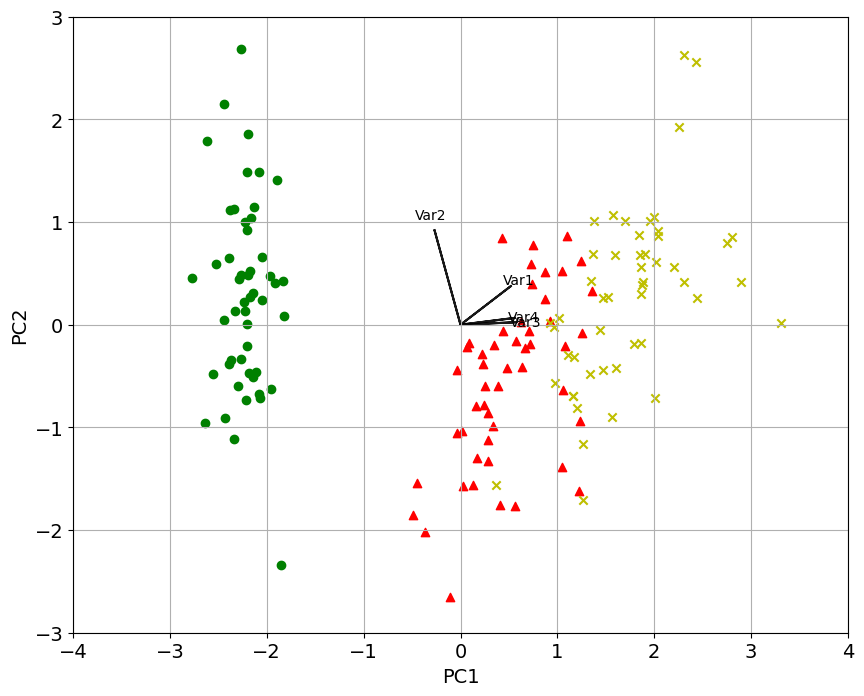

In [30]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) # reset ggplot style
# Call the biplot function for only the first 2 PCs
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

Comentarios:

> *De nuevo podemos verificar visualmente que a) la varianza está maximizada y b) que las características 1, 3 y 4 son las más importantes para PC1. De manera similar, la característica 2 y luego la 1 son las más importantes para PC2.*

>*Además, las flechas (variables/características) que apuntan en la misma dirección indican correlación entre las variables que representan, mientras que las flechas que apuntan en direcciones opuestas indican un contraste entre las variables que representan.*

In [ ]:
# Var 3 and Var 4 are extremely positively correlated
np.corrcoef(X[:,2], X[:,3])[1,0]
0.9628654314027957
# Var 2and Var 3 are negatively correlated
np.corrcoef(X[:,1], X[:,2])[1,0]
-0.42844010433054014

-0.42844010433054014

# **Preguntas Actividad 5**

**1.** ¿Qué es feature importance y para que nos sirve?

**Respuesta:** *La importancia de feature importance se refiere a las técnicas que asignan una puntuación a las características de entrada / variables en función de su utilidad para predecir una variable de destino.*

*Hay muchos tipos y fuentes de puntajes de importancia de características, aunque los ejemplos populares incluyen puntajes de correlación estadística, coeficientes calculados como parte de modelos lineales, árboles de decisión y puntajes de importancia de permutación.*

*Las puntuaciones de importancia de las características desempeñan un papel importante en un proyecto de modelado predictivo, lo que incluye proporcionar información sobre los datos, información sobre el modelo y la base para la reducción de la dimensionalidad y la selección de características que pueden mejorar la eficiencia y la eficacia de un modelo predictivo sobre el problema.*


**2.** ¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?

**Respuesta:**
*Dentro del ejercicio con el método PCA se encontro que:* 
*Se pueden reconstruir las matrices en el ejercicio uno solo con los vectores y valores de los eigen vectores, y en el ejercicio dos simulando con n el numero de componentes podemos reconstruir la imagen con un menos numero de componentes a la original pero ojo entre menor sean mas resolucion se perdera.
En el ultimo ejercicio se observo un ejemplo de como se aplica con algunas caractericas o variables tienen mas importancia que otras y como al realizar un cambio de espacio a un espacio de componentes muestra como algunas componentees tienen mas importancia que otras.*


**3.** ¿Dónde lo aplicarías o te sería de utilidad este conocimiento?

**Respuesta:** 

*El método de PCA permite por lo tanto "condensar" la información aportada por múltiples variables en solo unas pocas componentes. Aun así, no hay que olvidar que sigue siendo necesario disponer del valor de las variables originales para calcular las componentes.*
Dos de las principales aplicaciones del PCA son la visualización y el preprocesado de predictores previo ajuste de modelos supervisados.

*Como lo menciona (Amat 2020) es un método que se realiza en el preprocesado de los datos el cual nos permite disminuir el numero de dimensiones o variables al convertir el espacio en componentes y manejar menos información y obtener resultados similares a si utilizáramos todas las variables inicialmente.*

*Contras de PCA y variantes:*
*No todo es perfecto en la vida ni en PCA. Como contras, debemos decir que el algoritmo de PCA es muy influenciado por los outliers en los datos. Por esta razón, surgieron variantes de PCA para minimizar esta debilidad. Entre otros se encuentran: RandomizedPCA, SparcePCA y KernelPCA.*

*Por último decir que PCA fue creado en 1933 y ha surgido una buena alternativa en 2008 llamada t-SNE*


# **Bibliografia:** 

*   Loukas, S. (2020). PCA clearly explained —When, Why, How to use it and feature importance: A guide in Python. www.towardsdatascience.com. https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e}
*   Brownlee. (2020).*How to Calculate Feature Importance With Python*.Machine Learning Mastery.https://machinelearningmastery.com/calculate-feature-importance-with-python/

*  Amat. (2020). *PCA con python*.cienciadedatos.net.https://www.cienciadedatos.net/documentos/py19-pca-python.html#:~:text=PCA%20permite%20encontrar%20un%20n%C3%BAmero,el%20nombre%20de%20componente%20principal.

* Na8. (2018). *Comprende Principal Component Analysis*.https://www.aprendemachinelearning.com/comprende-principal-component-analysis/
